In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tflearn
%matplotlib inline

# Exploration des données

On importe le dataset

In [2]:
data = pd.read_csv("Exemple_Base_Client.csv")

In [3]:
data.dtypes

Client_ID                  object
Sexe                       object
Age                       float64
Navigateur                 object
OS                         object
Pays                       object
Geolocalisation            object
Campagne                     bool
Moyenne_Pages_Visitees    float64
Haut_Revenu                  bool
dtype: object

On affiche un extrait

In [4]:
data.head()

,Client_ID,Sexe,Age,Navigateur,OS,Pays,Geolocalisation,Campagne,Moyenne_Pages_Visitees,Haut_Revenu
0,6555,M,42.0,Chrome,Windows,United States,-78.3875 36.6676,False,12.333333,False
1,13226,F,18.0,Chrome,Windows,Belgium,4.35 50.85,False,6.000000,False
2,24448,F,71.0,Chrome,Windows,Japan,139.7677 35.6427,False,9.500000,False
3,31876,M,54.0,Chrome,MacOS X,Sweden,12.6944 56.0467,True,10.333333,False
4,39768,F,NaN,Chrome,Windows,United States,-83.7834 40.1183,False,11.000000,False


On plot la distribution entre des differentes variables

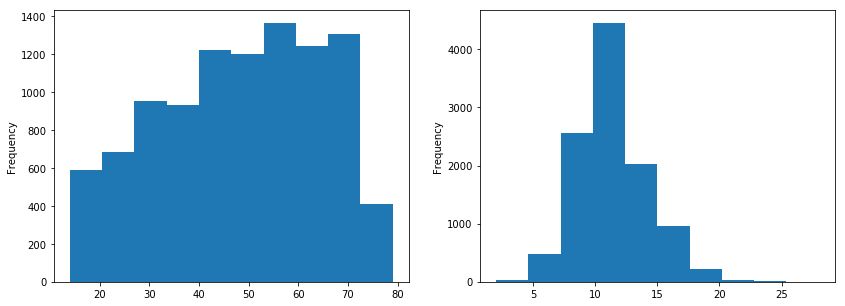

In [5]:
fig = plt.figure()
data.iloc[:,2].plot(kind='hist', figsize=(14,5), ax=fig.add_subplot(121))
data.iloc[:,8].plot(kind='hist', figsize=(14,5), ax=fig.add_subplot(122))

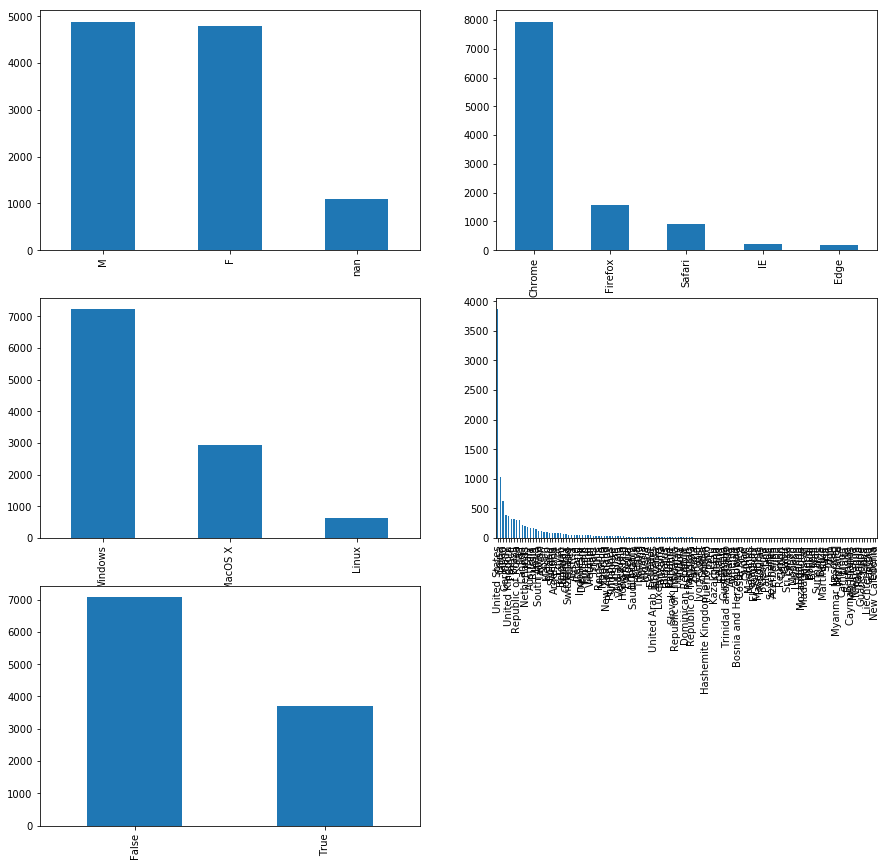

In [6]:
fig = plt.figure()
ind=0
for i  in (1,3,4,5,7):
    ind+=1
    ax = fig.add_subplot(32*10+ind)
    data.iloc[:,i].value_counts(dropna=False).plot(kind='bar', ax=ax, figsize=(15,15))

On remarque que les USA domine la variable Pays. Donc il serais plus pratique de convertire cette variable en une variable booleanne qui categorise USA/OutUSA

In [7]:
data.isnull().sum()

Client_ID                    0
Sexe                      1100
Age                        891
Navigateur                   0
OS                           0
Pays                       297
Geolocalisation            273
Campagne                     0
Moyenne_Pages_Visitees       0
Haut_Revenu                  0
dtype: int64

On remarque qu'il y a asset de données manquantes dans les colonnes Sexe, Age, Pays, et Geo.
On tachera de les remplir de façon approprier en suite.

# Traitement des données

subdivision de Geolocalisation en latitude et longitude 

In [8]:
geoSplit=pd.DataFrame(data['Geolocalisation'].str.split(' ',1, expand=True))
geoSplit = geoSplit.rename(columns={0:'lat',1:'long'})
data = pd.concat([data.iloc[:,0:6],geoSplit,data.iloc[:,7:10]], axis=1)

In [9]:
data.head()

,Client_ID,Sexe,Age,Navigateur,OS,Pays,lat,long,Campagne,Moyenne_Pages_Visitees,Haut_Revenu
0,6555,M,42.0,Chrome,Windows,United States,-78.3875,36.6676,False,12.333333,False
1,13226,F,18.0,Chrome,Windows,Belgium,4.35,50.85,False,6.000000,False
2,24448,F,71.0,Chrome,Windows,Japan,139.7677,35.6427,False,9.500000,False
3,31876,M,54.0,Chrome,MacOS X,Sweden,12.6944,56.0467,True,10.333333,False
4,39768,F,NaN,Chrome,Windows,United States,-83.7834,40.1183,False,11.000000,False


On remplis les valeurs numeriques manquantes 

In [10]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [11]:
data['lat']=pd.to_numeric(data['lat'])
data['long']=pd.to_numeric(data['long'])

In [12]:
data['lat']=data['lat'].fillna(data['lat'].mean())
data['long']=data['long'].fillna(data['long'].mean())

In [13]:
data['Pays']=data['Pays']=='United States'

In [14]:
data['Sexe']=data['Sexe'].fillna('X')

In [15]:
data.isnull().sum()

Client_ID                 0
Sexe                      0
Age                       0
Navigateur                0
OS                        0
Pays                      0
lat                       0
long                      0
Campagne                  0
Moyenne_Pages_Visitees    0
Haut_Revenu               0
dtype: int64

In [16]:
data['Age']=(data['Age']-data['Age'].mean())/data['Age'].std()
data['lat']=(data['lat']-data['lat'].mean())/data['lat'].std()
data['long']=(data['long']-data['long'].mean())/data['long'].std()
data['Moyenne_Pages_Visitees']=(data['Moyenne_Pages_Visitees']-data['Moyenne_Pages_Visitees'].mean())/data['Moyenne_Pages_Visitees'].std()

In [17]:
data['Pays']=data['Pays'].astype('int32')
data['Campagne']=data['Campagne'].astype('int32')
data['Haut_Revenu']=data['Haut_Revenu'].astype('int32')

In [18]:
data = data.loc[:,('Client_ID','Sexe','Age','Pays','Campagne','Moyenne_Pages_Visitees','Haut_Revenu')]

In [19]:
data2 = pd.concat([data['Client_ID'], pd.get_dummies(data.iloc[:,1:-1]), data['Haut_Revenu']], axis=1)

In [20]:
data2.dtypes

Client_ID                  object
Age                       float64
Pays                        int32
Campagne                    int32
Moyenne_Pages_Visitees    float64
Sexe_F                      uint8
Sexe_M                      uint8
Sexe_X                      uint8
Haut_Revenu                 int32
dtype: object

In [21]:
data2 = data2.iloc[:,1:19].astype('float32')

In [22]:
data2.head()


,Age,Pays,Campagne,Moyenne_Pages_Visitees,Sexe_F,Sexe_M,Sexe_X,Haut_Revenu
0,-0.384864,1.0,0.0,0.375381,0.0,1.0,0.0,0.0
1,-1.917121,0.0,0.0,-1.930742,1.0,0.0,0.0,0.0
2,1.466613,0.0,0.0,-0.656306,1.0,0.0,0.0,0.0
3,0.381264,0.0,1.0,-0.352869,0.0,1.0,0.0,0.0
4,0.000000,1.0,0.0,-0.110119,1.0,0.0,0.0,0.0


# Logitic regression

Echantillonage aléatoires du dataset en **training**, **validation** et **test**

In [23]:
train, test = train_test_split(data2, test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logisticRegr = LogisticRegression()

In [26]:
x_train = train.iloc[:,0:-1]
y_train = train.iloc[:,-1]

x_test = test.iloc[:,0:-1]
y_test = test.iloc[:,-1]

In [27]:
x_test

,Age,Pays,Campagne,Moyenne_Pages_Visitees,Sexe_F,Sexe_M,Sexe_X
4765,0.253576,0.0,0.0,0.035531,1.0,0.0,0.0
6321,-0.193332,0.0,0.0,0.618130,0.0,1.0,0.0
9351,-1.597901,0.0,1.0,-0.595618,1.0,0.0,0.0
7133,-0.384864,1.0,0.0,-1.930742,0.0,1.0,0.0
9679,1.338925,0.0,0.0,-0.474243,1.0,0.0,0.0
1998,1.402769,1.0,0.0,0.618130,0.0,0.0,1.0
9662,0.000000,0.0,1.0,-0.474243,0.0,1.0,0.0
3866,-0.001800,0.0,0.0,2.074629,1.0,0.0,0.0
3473,-0.512552,1.0,0.0,-0.352869,0.0,1.0,0.0
3890,1.785833,1.0,0.0,-0.838368,0.0,1.0,0.0


In [28]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
logisticRegr.predict(x_test).sum()

0.0

In [30]:
y_test.values.sum()

220.0

In [32]:
logisticRegr.class_weight